In [10]:
__file__ = 'rad_zu_ord_fit.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP2_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up

In [11]:
data = []
for file in sorted(os.listdir('Data')):
        with open('Data/'+file, mode='r') as tf:
            data = np.genfromtxt(tf,delimiter="\t").T

In [12]:
ord = data[0]
m1 = up.uarray(data[1],np.full(len(data[1]),0.05))
m2 = up.uarray(data[2],np.full(len(data[2]),0.05))

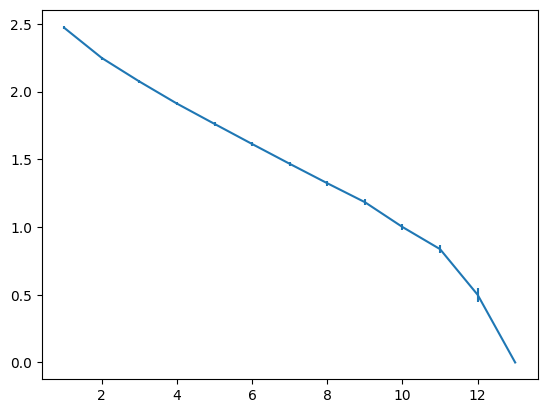

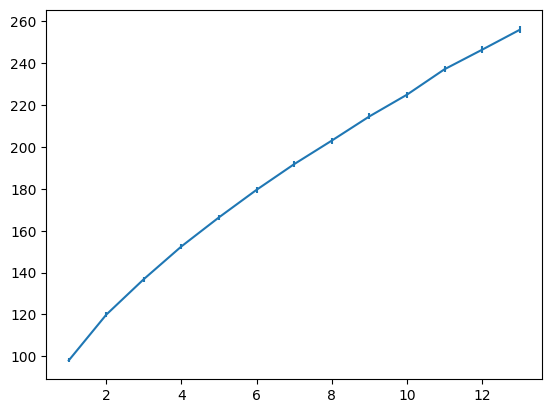

In [13]:
#kp ob das richtig is sost nehmen wa nur2
m1lin = up.sqrt(m1)
m2lin = m2**2


plt.errorbar(ord,up.nominal_values(m1lin),yerr=up.std_devs(m1lin))
plt.show()
plt.errorbar(ord,up.nominal_values(m2lin),yerr=up.std_devs(m2lin))
plt.show()

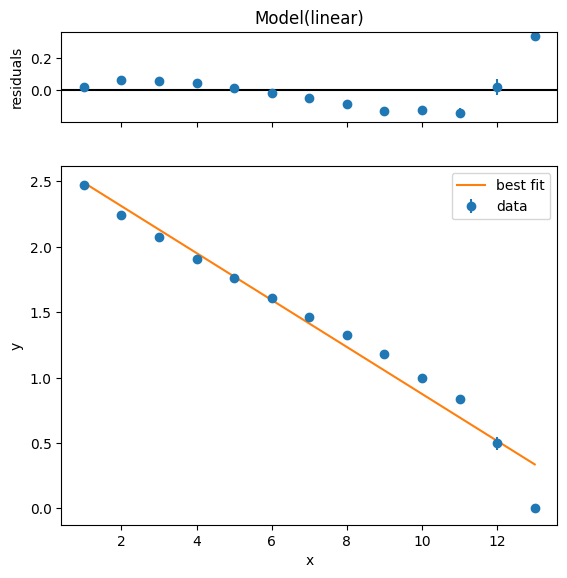

In [14]:
res1 = f.linear_fit(up.nominal_values(m1lin),ord,up.std_devs(m1lin))
res1.plot()
plt.show()

[98.01+/-0.9900000000000001 119.90249999999999+/-1.095 136.89+/-1.17
 152.52249999999998+/-1.235 166.41+/-1.29 179.56+/-1.34 191.8225+/-1.385
 203.0625+/-1.425 214.6225+/-1.465 225.0+/-1.5 237.16000000000003+/-1.54
 246.48999999999998+/-1.57 256.0+/-1.6]
[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 13
    # variables        = 2
    chi-square         = 237.171396
    reduced chi-square = 21.5610360
    Akaike info crit   = 41.7498382
    Bayesian info crit = 42.8797370
    R-squared          = 0.99206882
[[Variables]]
    slope:      13.1266740 +/- 0.44954979 (3.42%) (init = 12.7435)
    intercept:  94.6579579 +/- 3.15414292 (3.33%) (init = 97.5226)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.844


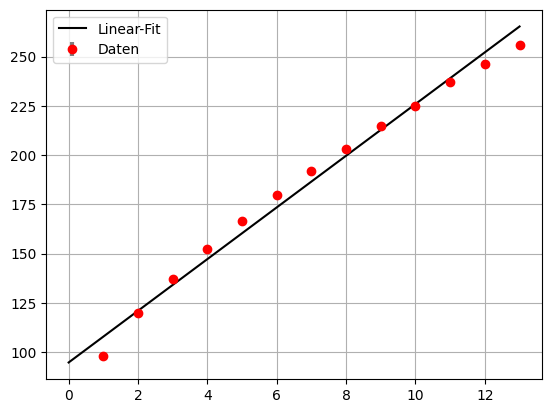

In [15]:
res2 = f.linear_fit(up.nominal_values(m2lin),ord,up.std_devs(m2lin))
print(m2lin)
plt.show()
print(res2.fit_report())
plt.errorbar(ord,up.nominal_values(m2lin),yerr = up.std_devs(m2lin),fmt='ro',ecolor='gray', elinewidth=3, capsize=0,label = 'Daten')
plt.plot(np.arange(0,14),res2.eval(x=np.arange(0,14)),color='k',linestyle='-',alpha=1,label="Linear-Fit")




plt.grid()
plt.legend()